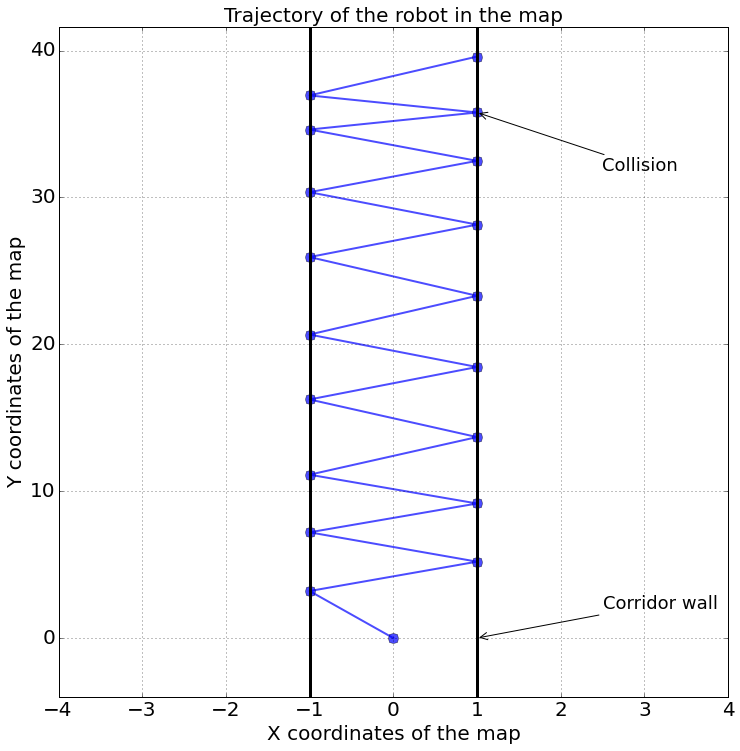

In [60]:
# print """Creating a randomized corridor trajectory of the Sphero robot undergoing inelastic collision with the walls. This 
# serves as the reference trajectory for mapping and offline-SLAM, and will be used to also compare various estimation techniques
# and Sphero robot models"""

import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

d = 2                                           # Width of the corridor

mu, sigma = 2*d, d/2                            # Mean and Covariance of the distribution in collisions
s = np.random.normal(mu,sigma,10)               # Random distribution of collisions from a Gaussian sampling
s = np.cumsum(s)                                # Cumulative distribution from the sampling of Gaussian; left corridor

g = np.matrix([0.0]*len(s))
for i in range(len(s)-1):
    g[:,i] = (s.item(i) + s.item(i+1))/2        # Right corridor

cor1 = np.matrix([-d/2]*len(s))
cor1 = np.vstack([cor1,s])                      # Coordinates of collisions on the left corridor
cor2 = np.matrix([d/2]*len(s))
cor2 = np.vstack([cor2, g])                     # Coordinates of collisions on the right corridor

origin = np.vstack([0,0])                       # Initial position of the robot

cor = np.hstack([origin, cor1[:,0], cor2[:,0]]) # Trajectory initialization

for i in range(1, len(s)-1):
    cor = np.hstack([cor, cor1[:,i], cor2[:,i]]) # Trajectory of the robot

a = []          # Empty list
b = []

for i in range(2*len(s)-1):
    a.append(cor.item(0,i))
    b.append(cor.item(1,i))

plt.figure(figsize=(12,12), dpi=100, facecolor = 'w')
plt.xlabel('X coordinates of the map',size=20)
plt.ylabel('Y coordinates of the map',size=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Trajectory of the robot in the map',size=20)
plt.xlim(-d/2-3,d/2+3)
plt.ylim(-4,cor.max()+2)
plt.grid()
plt.plot(a,b, linestyle='-', marker='o', lw=2, markersize = 10, alpha=0.7)
plt.axvline(x=-d/2, linewidth=3, color='k')
plt.axvline(x=d/2, linewidth=3, color='k')
plt.annotate('Corridor wall', xy=(d/2,0), xytext=(2.5,2), size=18, arrowprops=dict(arrowstyle="->"))
plt.annotate('Collision', xy=(d/2,b[-3]), xytext=(2.5,b[-3]-4), size=18, arrowprops=dict(arrowstyle="->"))
plt.show()


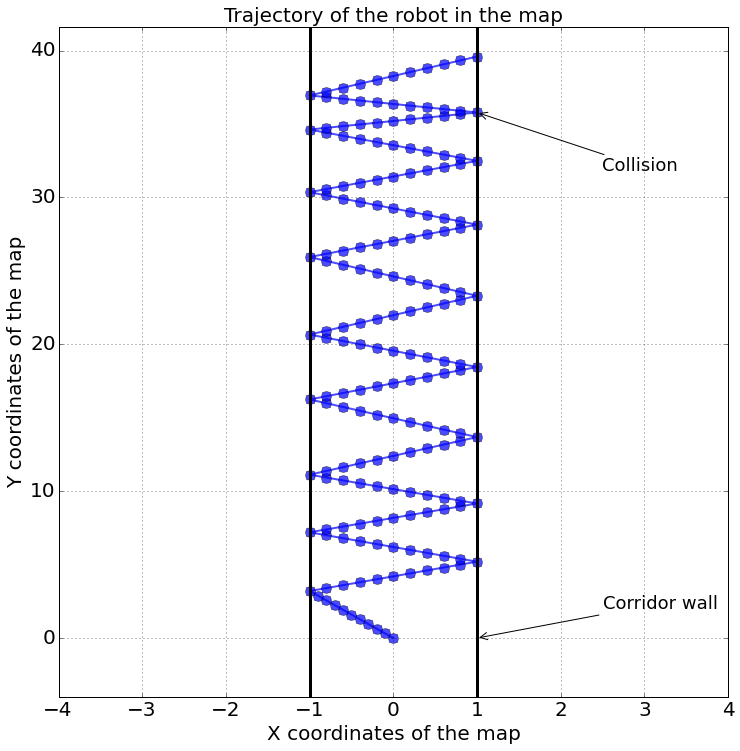

In [63]:
# From the Corridor_trajectory file, let's build what is avalailable in the hands. First, the robot's collision coordinates are 
# available. Next, lets build the piecewise trajectory as well as the robot's observation vector. 

# Robot actual trajectory in points; initialization
xtraj=[]
ytraj=[]

for i in range(18):

    m = (cor[1,i+1]-cor[1,i])/(cor[0,i+1]-cor[0,i])            # Slope of the trajectory
    xdist = cor[0,i+1] - cor[0,i]
    n = 10                                                     # Number o samples between consecutive collision
    ddist = xdist / n

    for j in range(10):
        xtraj.append(cor.item(0,i)+ j * ddist)
        ytraj.append(cor.item(1,i)+ m * (xtraj[-1] - cor.item(0,i)))

xtraj.append(cor.item(0,-1))
ytraj.append(cor.item(1,-1))

plt.figure(figsize=(12,12), dpi=100, facecolor = 'w')
plt.xlabel('X coordinates of the map',size=20)
plt.ylabel('Y coordinates of the map',size=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Trajectory of the robot in the map',size=20)
plt.xlim(-d/2-3,d/2+3)
plt.ylim(-4,cor.max()+2)
plt.grid()
plt.plot(xtraj,ytraj, linestyle='-', marker='o', lw=2, markersize = 10, alpha=0.7)
plt.axvline(x=-d/2, linewidth=3, color='k')
plt.axvline(x=d/2, linewidth=3, color='k')
plt.annotate('Corridor wall', xy=(d/2,0), xytext=(2.5,2), size=18, arrowprops=dict(arrowstyle="->"))
plt.annotate('Collision', xy=(d/2,b[-3]), xytext=(2.5,b[-3]-4), size=18, arrowprops=dict(arrowstyle="->"))
plt.show()

In [59]:
# Observation vector or the collision angles
obs = []
for i in range(18):
    ac = np.arctan2(abs(cor[0,i]-cor[0,i+1]), abs(cor[1,i]-cor[1,i+1])) * 180/np.pi
    obs.append(ac)